In [212]:

!pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 13.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 11.3 MB/s eta 0:00:00


In [214]:
# Import libraries and packages
import openml
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# load dataset directly from openML 
dataset_id = 44989
dataset = openml.datasets.get_dataset(dataset_id)
house, *_ = dataset.get_data()


#nashivill 43734
#istanvul 43688

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [4]:
# Run this cell so pandas displays all columns
pd.set_option('display.max_columns', None)

**Data Exploration**

In [5]:
# Display the first 10 rows of the data
house.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014,10,13
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400.0,1951.0,1991.0,98125,47.7210,-122.319,1690.0,7639.0,2014,12,9
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0.0,1933.0,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015,2,25
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910.0,1965.0,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014,12,9
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0.0,1987.0,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015,2,18


In [6]:
house.tail(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
21608,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530.0,0.0,2009.0,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014,5,21
21609,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310.0,0.0,2014.0,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015,2,23
21610,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020.0,0.0,2009.0,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014,6,23
21611,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600.0,0.0,2004.0,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015,1,16
21612,325000.0,2,0.75,1020.0,1076.0,2.0,0,0,3,7,1020.0,0.0,2008.0,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014,10,15


In [7]:
house.size

475486

In [8]:
# Shape of the dataset
house.shape

(21613, 22)

In [9]:
# Get information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  uint8   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  float64 
 4   sqft_lot       21613 non-null  float64 
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  uint8   
 7   view           21613 non-null  uint8   
 8   condition      21613 non-null  uint8   
 9   grade          21613 non-null  uint8   
 10  sqft_above     21613 non-null  float64 
 11  sqft_basement  21613 non-null  float64 
 12  yr_built       21613 non-null  float64 
 13  yr_renovated   21613 non-null  float64 
 14  zipcode        21613 non-null  category
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 non-null  

**Statistical Tests**

In [10]:
# Get descriptive statistics
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


/var/folders/67/4ltrm0810d91qhxpnv3hb4dc0000gn/T/ipykernel_56862/2031218033.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = house.corr()


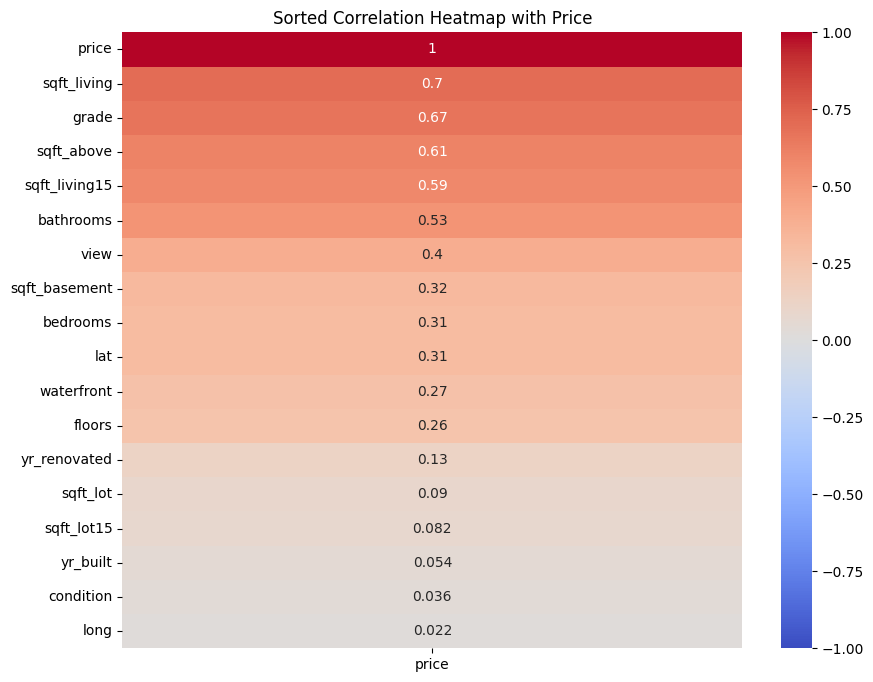

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = house.corr()

# Sort the correlation values with respect to 'price'
sorted_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Create a new correlation matrix based on the sorted order
sorted_correlation_matrix = correlation_matrix.loc[sorted_correlation.index, ['price']]

sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sorted Correlation Heatmap with Price')
plt.show()

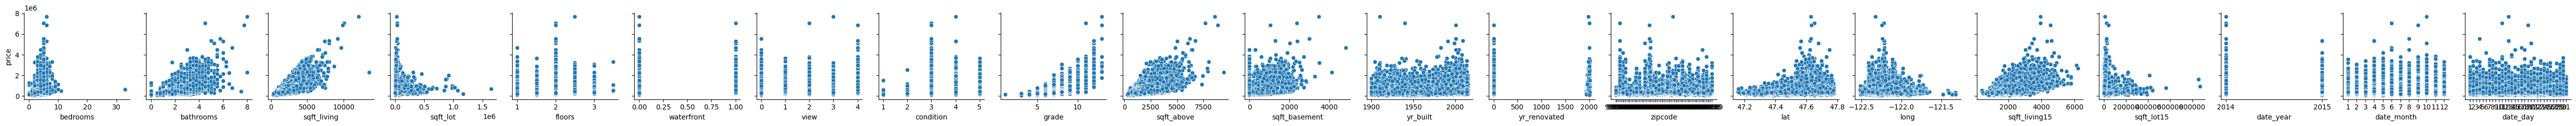

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month', 'date_day']


In [17]:
sns.pairplot(house, x_vars=house.columns[1:], y_vars='price')
plt.show()

columns_list = house.columns.tolist()
print(columns_list)


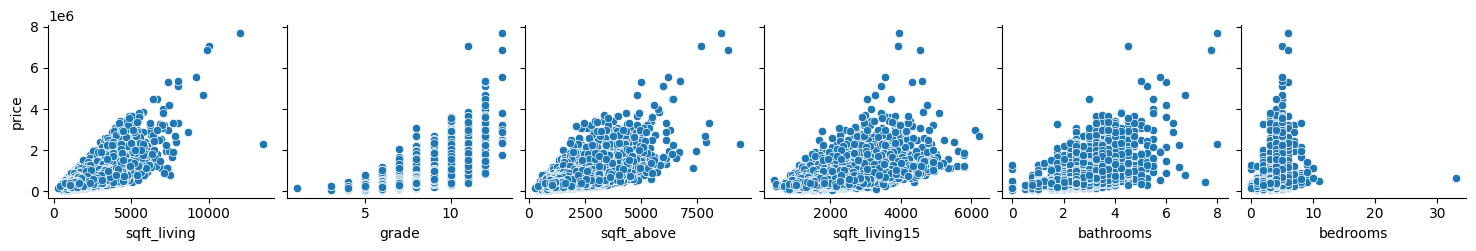

In [82]:
columns_of_interest = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15','bathrooms','bedrooms']  # Add the columns you are interested in
subset_df = house[columns_of_interest]

sns.pairplot(house, x_vars=subset_df, y_vars='price')
plt.show()

In [29]:
count_cols = ['sqft_living',
              'grade',
              'sqft_above',
              'sqft_living15',
              'bathrooms',
              
              ]

for column in count_cols:
    q1 = house[column].quantile(0.25)
    q3 = house[column].quantile(0.75)
    iqr = q3 - q1
    median = house[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (house[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, sqft_living: 1366
Number of outliers, grade: 4251
Number of outliers, sqft_above: 1752
Number of outliers, sqft_living15: 1460
Number of outliers, bathrooms: 1288


In [165]:
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


## Model evaluation and selection

**Regression**

In [180]:
# Split the inputs and outputs into separate arrays
# Assuming 'house' is your DataFrame
x = house[['sqft_living']]
y = house[['price']]

# # Convert 1-D arrays into 2-D because the commands later will require it
# x = np.expand_dims(x, axis=1)
# y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (21613, 1)
the shape of the targets y is: (21613, 1)


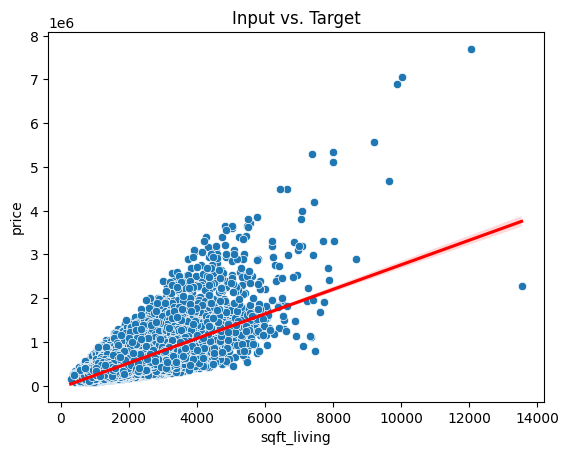

In [221]:

# Create a seaborn scatter plot using DataFrame
sns.scatterplot(data=house, x='sqft_living', y='price')

# Add a regression line
sns.regplot(x='sqft_living', y='price', data=house, scatter=False, color='red')

plt.title("Input vs. Target")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

# Create a Plotly scatter plot with a regression line
fig = px.scatter(house, x='sqft_living', y='price', title="Input vs. Target")

# Show the plotly interactive plot
fig.show()

**Split the dataset into training, cross validation, and test sets**

In [182]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (12967, 1)
the shape of the training set (target) is: (12967, 1)

the shape of the cross validation set (input) is: (4323, 1)
the shape of the cross validation set (target) is: (4323, 1)

the shape of the test set (input) is: (4323, 1)
the shape of the test set (target) is: (4323, 1)


In [184]:
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (12967, 1)
y_train shape: (12967, 1)


In [185]:
linear_model = LinearRegression()

# Fit the linear model
linear_model.fit(x_train, y_train)

LinearRegression()

In [190]:
b = linear_model.intercept_
w = linear_model.coef_

# Print coefficients and intercept
print(f"w = {w[0, 0]}, b = {b[0]:.2f}")

w = 274.5545247027872, b = -32191.69


In [197]:
print(f"'manual' prediction: f_wb = wx+b : {1200*w + b}")

'manual' prediction: f_wb = wx+b : [[297273.74]]


In [207]:
def predict_house_price(sqft_living, model):
    # Preprocess the input if needed (scaling, formatting, etc.)
    # Here, assuming sqft_living is the only feature and it needs no further preprocessing
    
    # Make the prediction
    input_data = np.array([[sqft_living]])
    prediction = model.predict(input_data)
    
    # Return the prediction
    return prediction[0]

# Example usage:
sqft_input = 1200
predicted_price = predict_house_price(sqft_input, linear_model)

print(f"Prediction for a {sqft_input} sqft house: ${predicted_price[0]:0.2f}")



Prediction for a 1200 sqft house: $297273.74


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



**Multiple features**

In [222]:
# Assuming 'house' is your DataFrame
X_train = house[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y_train = house['price']

In [223]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [224]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [ 2.45e+02  1.11e+05 -8.05e+01  2.28e+01 -3.55e+04], b = -646863.75


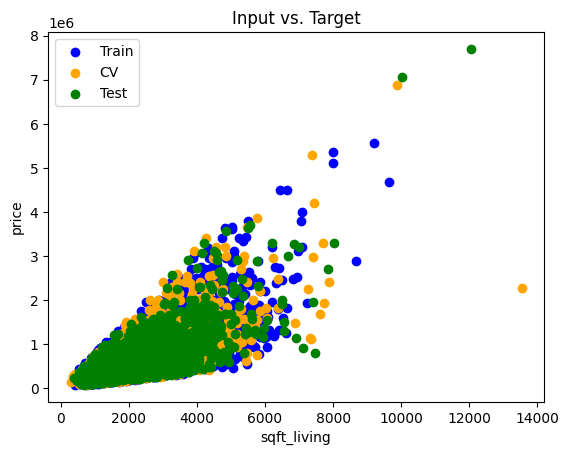

In [160]:
# Create a scatter plot for the entire dataset with different colors for each set.
plt.scatter(x=x_train, y=y_train, label='Train', color='blue')
plt.scatter(x=x_cv, y=y_cv, label='CV', color='orange')
plt.scatter(x=x_test, y=y_test, label='Test', color='green')

plt.title("Input vs. Target")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.legend()
plt.show()

# # Create a scatter plot for the entire dataset with different colors for each set.
# plt.scatter(x=x_train.flatten(), y=y_train.flatten(), label='Train', color='blue')
# plt.scatter(x=x_cv.flatten(), y=y_cv.flatten(), label='CV', color='orange')
# plt.scatter(x=x_test.flatten(), y=y_test.flatten(), label='Test', color='green')

# plt.title("Input vs. Target")
# plt.xlabel("sqft_living")
# plt.ylabel("price")
# plt.legend()
# plt.show()

**Fit linear model**

Computed mean of the training set: 2074.18
Computed standard deviation of the training set: 901.04


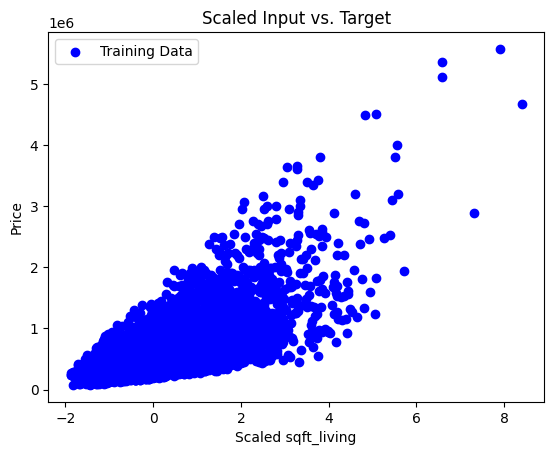

In [162]:
# # # Reshape x_train to have two dimensions
# x_train_2d = np.squeeze(x_train, axis=(2,))  # This removes the singleton dimension

# # Initialize the class
# scaler_linear = StandardScaler()

# # Compute the mean and standard deviation of the training set then transform it
# X_train_scaled = scaler_linear.fit_transform(x_train_2d)

# print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
# print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

# Create a scatter plot
plt.scatter(X_train_scaled, y_train, label='Training Data', color='blue')
plt.title("Scaled Input vs. Target")
plt.xlabel("Scaled sqft_living")
plt.ylabel("Price")
plt.legend()
plt.show()

**Train the model**

In [163]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

**Evaluate the model**

In [167]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# Convert y_train to a NumPy array
y_train_array = y_train.to_numpy().squeeze()

# Initialize total squared error
total_squared_error = 0

# Iterate through the predictions and actual values
for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train_array[i]) ** 2
    total_squared_error += squared_error_i

# Calculate mean squared error
mse = total_squared_error / (2 * len(yhat))

print(f"Training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 32346210479.130245
Training MSE (for-loop implementation): 32346210479.130337


In [168]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2074.18
Standard deviation used to scale the CV set: 901.04
Cross validation MSE: 37442731547.78583


## Adding Polynomial Features

**Create the additional futures**

In [169]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[2.45e+03 6.00e+06]
 [3.55e+03 1.26e+07]
 [1.48e+03 2.19e+06]
 [2.10e+03 4.41e+06]
 [1.52e+03 2.31e+06]]


In [170]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 0.42  0.18]
 [ 1.64  1.49]
 [-0.66 -0.58]
 [ 0.03 -0.14]
 [-0.62 -0.56]]


In [171]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 29311259750.764797
Cross validation MSE: 40003896207.97503


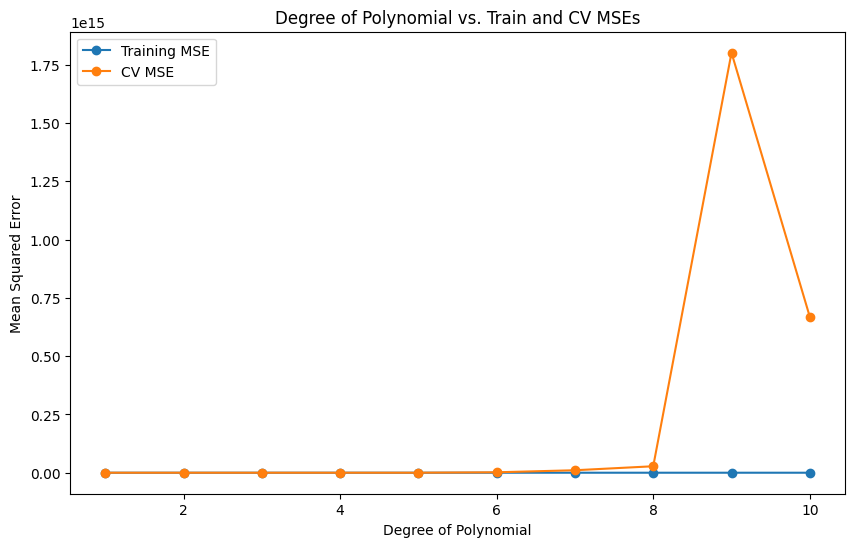

In [173]:
# Initialize lists containing the lists, models, and scalers
train_mses = []
cv_mses = []
models = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = poly.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)

# Create a plot
plt.figure(figsize=(10, 6))

# Plot training MSEs
plt.plot(degrees, train_mses, label='Training MSE', marker='o')

# Plot cross-validation MSEs
plt.plot(degrees, cv_mses, label='CV MSE', marker='o')

# Add labels and title
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Degree of Polynomial vs. Train and CV MSEs')

# Add legend
plt.legend()

# Show the plot
plt.show()

**Chosing the best model**

In [174]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=1


In [175]:
# Add polynomial features to the test set
poly = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 32346210479.13
Cross Validation MSE: 37442731547.79
Test MSE: 36477478445.14


## Linear regression using scikit-learn

**Gradient Descent**

In [232]:
# Define the features
X_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',]

# Extract features and target variable
X_train = house[X_features]
y_train = house['price']

**Scale/normalize training dataset**

In [78]:
# Implement feature scaling
scaler = StandardScaler() # Instantiate a StandardScaler object
# scalar = StandardScaler(with_std=False) # Mean normalization
# scalar = MinMaxScaler() # (x - min)/(max - min)
X_norm = scaler.fit_transform(X_train) # Fit and transform your data
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train, axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm, axis=0)}")

Peak to Peak range by column in Raw        X:sqft_living      13250.0
grade               12.0
sqft_above        9120.0
sqft_living15     5811.0
bathrooms            8.0
bedrooms            33.0
dtype: float64
Peak to Peak range by column in Normalized X:[14.43 10.21 11.01  8.48 10.39 35.48]


**Create and fit the regression model**

In [79]:
# Training the regression model
sgdr = SGDRegressor(max_iter=5000) # Instantiate a SGDRegressor object
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=5000)
number of iterations completed: 20, number of weight updates: 432261.0


**View parameters**

In [80]:
# Extract optimized parameter values from the trained model
b_norm = sgdr.intercept_ # Bias b
w_norm = sgdr.coef_ # Weights w
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [251043.78 118325.45 -67602.44  13290.3  -18263.27 -46962.02], b:[539610.06]


**Make prediction**

In [227]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:1000]}" )
print(f"Target values \n{y_train[:1000]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 309795.57  586065.01  207785.61  436081.36  491519.44 1583017.22
  400128.44  280945.25  492946.65  430695.74  986803.17  380753.68
  366253.93  329015.68  306254.16  847223.71  432857.14  345052.63
  358694.72  322051.43  389074.19  940608.51  500311.2   325018.67
  640960.15  281008.25  701431.9   462719.62  420276.12  615879.85
  617478.69  351319.76  531246.4   397667.66  463365.61  658941.57
  225485.07  570026.73  292940.26  625271.18  713442.78 1066109.44
  875914.02  389214.36  257690.34  787624.65  170534.3   663837.6
  298254.6   851094.91  308803.93  787437.6   370931.26  579405.28
  652908.69  753202.58  446500.09  638782.21  684358.1   459014.49
  636340.97  306376.85  671862.2   466343.2   419011.55  656684.16
  848293.6   444020.7   268889.58  837446.57 1427584.32  307235.28
  580679.2   575383.77  477731.6  1043238.58  431139.03  274230.83
  390634.71  999872.88  618769.85  372034.72  6

**Plot results**

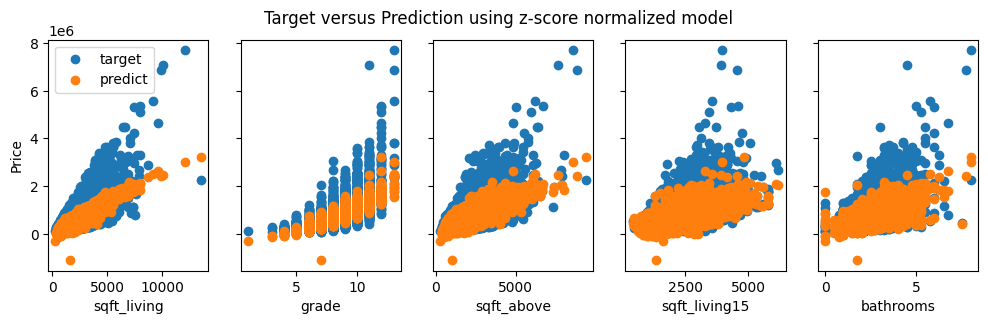

In [233]:
# Plot predictions and targets vs original features    
fig, ax = plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train[feature], y_train, label='target')
    ax[i].set_xlabel(feature)
    ax[i].scatter(X_train[feature], y_pred, label='predict')

ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("Target versus Prediction using z-score normalized model")

# Display the plot
plt.show()